In the last week of the [Data Management and Visualisation course](https://www.coursera.org/learn/data-management-visualization/home/welcome) we're finally visualising our data ([I'm working with](http://lilithelina.tumblr.com/post/128347327089/choice-of-data) the [Gapminder](http://www.gapminder.org/) data set) - using univariate (single variable) and multivariate plots.  
As a reminder, my topic is **"Breast Cancer Causes Internet Usage!"**, or BCCIU for short. The hypothesis is that in countries with more breast cancer cases, the internet use rate is also higher. Additionally, I'm looking at an association between breast cancer and female employment rates (are less women working in a country with more breast cancer cases, possibly because they are ill?).  
As before, the output will look lots better in the [nbviewer](http://nbviewer.ipython.org/github/LilithElina/Data-Management-and-Visualization/blob/master/Week%20Four.ipynb) than on tumblr, so you might want to read it over there (but you don't have to).

First up comes all the code I created in the [data preparation and management scripts](http://lilithelina.tumblr.com/post/130065040767/data-management-python) before, minus the output.

In [2]:
# activate inline plotting, should be first statement
%matplotlib inline

# load packages
import pandas
import numpy

# read in data
data = pandas.read_csv("../gapminder.csv", low_memory=False)

# subset the data and make a copy to avoid error messages later on
sub = data[["country", "breastcancerper100th", "femaleemployrate", "internetuserate"]]
sub_data = sub.copy()

# change data types to numeric
sub_data["breastcancerper100th"] = sub_data["breastcancerper100th"].convert_objects(convert_numeric=True)
sub_data["femaleemployrate"] = sub_data["femaleemployrate"].convert_objects(convert_numeric=True)
sub_data["internetuserate"] = sub_data["internetuserate"].convert_objects(convert_numeric=True)

# remove rows with missing values
sub2 = sub_data.dropna()
sub_data2 = sub2.copy()

# create five equal-sized groups per variable
sub_data2['breastGroup'] = pandas.qcut(sub_data2.breastcancerper100th, 5)
sub_data2['employGroup'] = pandas.qcut(sub_data2.femaleemployrate, 5)
sub_data2['internGroup'] = pandas.qcut(sub_data2.internetuserate, 5)

C:\Anaconda\envs\py34\lib\site-packages\IPython\kernel\__main__.py:16: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
C:\Anaconda\envs\py34\lib\site-packages\IPython\kernel\__main__.py:17: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
C:\Anaconda\envs\py34\lib\site-packages\IPython\kernel\__main__.py:18: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


For data visualisation, I need two extra packages: `matplotlib` is the standard plotting library in Python, while `seaborn` is an [additional package](http://stanford.edu/~mwaskom/software/seaborn/index.html) based on `matplotlib` that creates more beautiful plots.

In [3]:
import seaborn
import matplotlib.pyplot as plt

Now I can create histograms of my single variables, displaying the distributions I described with numbers before. The `distplot()` function will automatically decide how to group/bin the data for me, so I don't have to worry about that again. Of course, I could also use the argument `bins` inside the function to set them manually, but I trust the built-in plotting function here.

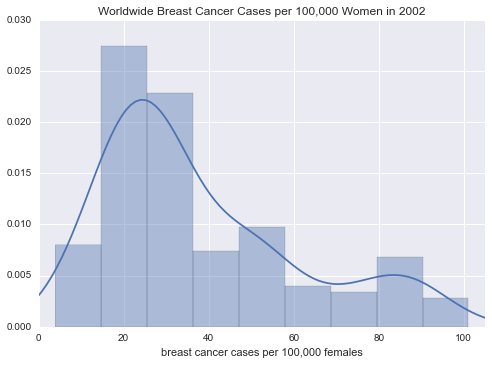

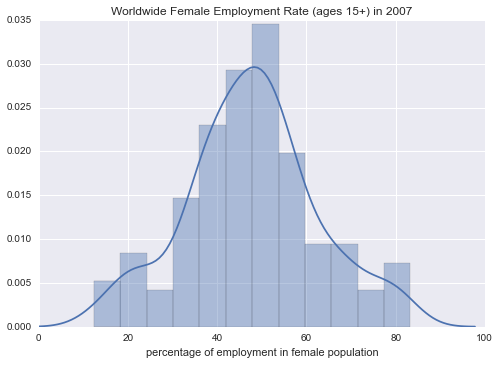

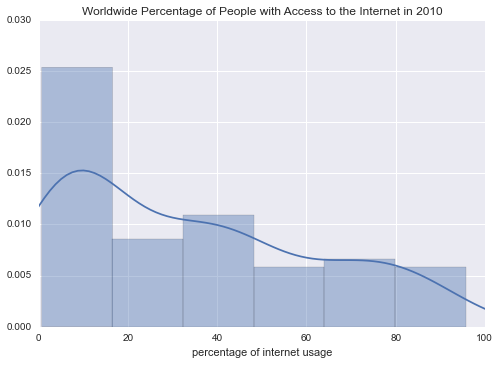

In [4]:
seaborn.distplot(sub_data2["breastcancerper100th"]);
plt.xlabel('breast cancer cases per 100,000 females');
plt.title('Worldwide Breast Cancer Cases per 100,000 Women in 2002');
plt.xlim(0,105)
plt.show() # to create individual plots in one ipython notebook cell

seaborn.distplot(sub_data2["femaleemployrate"]);
plt.xlabel('percentage of employment in female population');
plt.title('Worldwide Female Employment Rate (ages 15+) in 2007');
plt.xlim(0,100)
plt.show()

seaborn.distplot(sub_data2["internetuserate"]);
plt.xlabel('percentage of internet usage');
plt.title('Worldwide Percentage of People with Access to the Internet in 2010');
plt.xlim(0,100)
plt.show()

OK, maybe the internet usage histogram is not so nice. Would it look better with more bins?

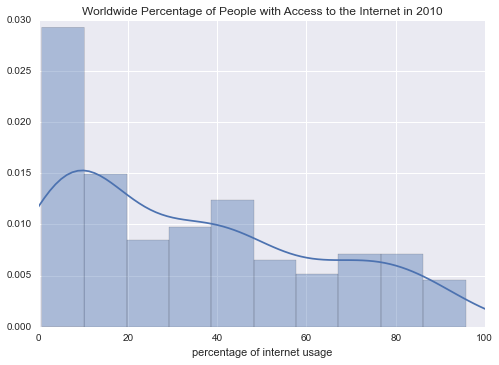

In [12]:
seaborn.distplot(sub_data2["internetuserate"], bins=10);
plt.xlabel('percentage of internet usage');
plt.title('Worldwide Percentage of People with Access to the Internet in 2010');
plt.xlim(0,100)
plt.show()

Of course, the distribution is the same, but I think it looks better. By the way, I'm using `plt.xlim()` to set limits to the x axis, since the density curve otherwise widens the whole plot unnecessarily.

As I suspected [before](http://lilithelina.tumblr.com/post/130065040767/data-management-python), both breast cancer cases and internet usage are right skewed, while the female employment rate is more normally distributed. All variables seem mostly unimodal, but there is a small second peak for about 80 to 90 breast cancer cases in 100,000 women, so maybe we could also call this a bimodal distribution. In order to check that, I can randomly sample the numbers (with replacement) over and over again - a rudimentary bootstrapping. If the second peak is consistent in many of these bootstrapping runs, I'd call the breast cancer cases distribution bimodal.

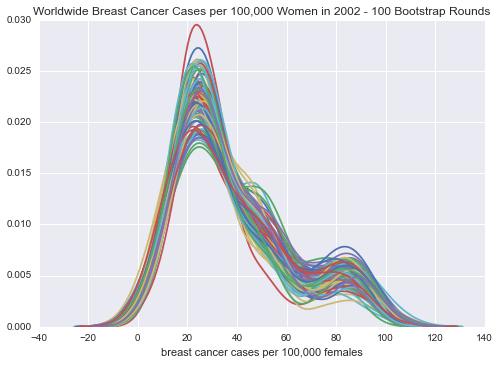

In [5]:
# import package for random sampling
import random

# do 100 repetitions of the following:
# - create an empty list in which to store the values
# - run a second for loop, with as many repetitions as we have observations (and convert dataframe column to list)
# - select a random value from the data (still a list, otherwise random.choice() wouldn't work)
# - add the random value to the "sample" list
# - plot the randomly selected values in "sample" when sampling is done
for i in range(0,100):
    sample = []
    for j in range(0,len(list(sub_data2["breastcancerper100th"]))):
        num = random.choice(list(sub_data2["breastcancerper100th"]))
        sample.append(num)
    seaborn.distplot(sample, hist=False);
# add plot labels
plt.xlabel('breast cancer cases per 100,000 females');
plt.title('Worldwide Breast Cancer Cases per 100,000 Women in 2002 - 100 Bootstrap Rounds');

It looks like the peak is genuine, so we have one bimodal and two unimodal distributions here.

Finally, I'm going to have a look at the relationships between breast cancer cases and internet usage or female employment rate, respectively. Both can be visualised in scatterplots.

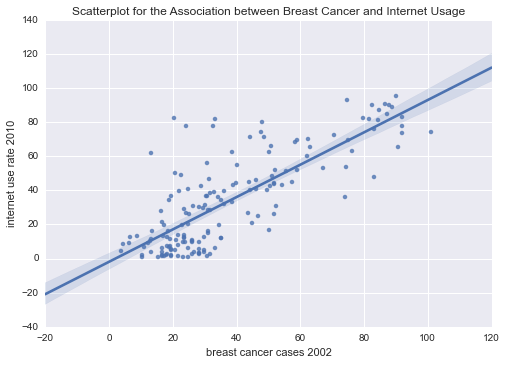

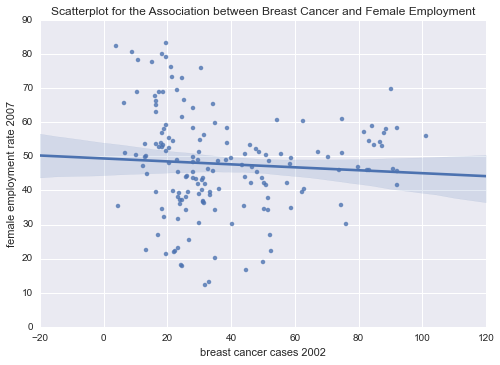

In [6]:
seaborn.regplot(x="breastcancerper100th", y="internetuserate", fit_reg=True, data=sub_data2);
plt.xlabel('breast cancer cases 2002');
plt.ylabel('internet use rate 2010');
plt.title('Scatterplot for the Association between Breast Cancer and Internet Usage');
plt.show()

seaborn.regplot(x="breastcancerper100th", y="femaleemployrate", fit_reg=True, data=sub_data2);
plt.xlabel('breast cancer cases 2002');
plt.ylabel('female employment rate 2007');
plt.title('Scatterplot for the Association between Breast Cancer and Female Employment');
plt.show()

The first scatterplot nicely shows a linear relationship between breast cancer and internet usage ([told you so!](http://lilithelina.tumblr.com/post/128347327089/choice-of-data)). In countries with only few breast cancer cases per 100,000 women, the internet usage is also lower - and vice versa. So, does breast cancer cause internet usage? Probably not. Correlation does not equal causation, and there could be many other reasons why this relationship is so pronounced. What if, for example, countries where many people have access to the internet also offer regular breast cancer check-ups? You'd probably get a higher discovery rate and therefore "more breast cancer".  
The distribution of female employment rates over breast cancer cases is very variable - no clear, linear relationship is visible, so there is nothing to conclude here.